# Posterior Predictive Checks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import beta
import random

In [2]:
# From the notebook, the posterior distribution for the control group is a Beta
# with parameters alpha = 58, and beta = 65
posterior_samples = sts.beta.rvs(a=58,b=65, size=1000)

# Original control data
success = [9,11,4, 21, 12, 0]
trials = [15,18,10,39,29,10]

success_rate = [i / j for i, j in zip(success, trials)]

# Generates synthetic data using a binomial for number of successes
replicated_samples = []
for i in posterior_samples:
  sample = [sts.binom(j, i).rvs() for j in trials]
  replicated_samples.append(sample)

replicated_samples = np.array(replicated_samples)

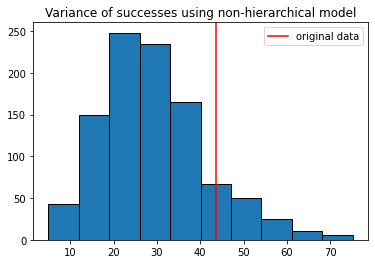

P-value: 0.119


In [3]:
# Define our test statistic as the variance 
def test_statistic(data):
  return np.var(data)

# apply the test statistic for samples and observed data
testing = np.array([test_statistic(i) for i in replicated_samples])
observed = test_statistic(success)

# plot the histogram
plt.title('Variance of successes using non-hierarchical model')
plt.hist(testing, edgecolor='black')
plt.axvline(observed, color = 'red', label='original data')
plt.legend()
plt.show()

# calculate p-value
p_value = sum(testing > test_statistic(success)) / len(testing)
print("P-value:", p_value)

The proportion of variance values in the replicated dataset is 11.5% greater than the original observed data. We can see that the non-hiearchical model does not explain the control group well since our p-value is greater than 0.05.